# Requierments


In [52]:
%pip install sentence_transformers
%pip install hazm
! python -m pip install statsmodels
%pip install tensorflow_ranking

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.4/150.4 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [107]:
from sentence_transformers import SentenceTransformer
import pandas as pd
import random as rd
import json
import numpy as np
import re
import numpy as np
import nltk
import string
from statsmodels.stats.inter_rater import fleiss_kappa
from sklearn.metrics import ndcg_score , dcg_score
import tensorflow as tf
import tensorflow_ranking as tfr
from matplotlib import pyplot as plt

# Aggregate Data After Tagging

In [ ]:
tagged11 =pd.read_csv("/content/1 - 1.csv")
tagged12 =pd.read_csv("/content/new_1_tagged.csv")
tagged21 =pd.read_csv("/content/2 _tagged.csv")
tagged22 =pd.read_csv("/content/new_2_tagged.csv")
tagged3 =pd.read_csv("/content/new3_tagged.csv")
tagged41 =pd.read_csv("/content/4_1.csv")
tagged42 =pd.read_csv("/content/4_2.csv")

In [ ]:
tagged11 = tagged11.drop(['Unnamed: 0', 'index'], axis=1)
tagged11

,input_id,output_id,input_text,output_text,chapter,tag
0,46,2987,نباید عیب دیگران را بر ملا کنیم,بی قدر ساخت خود را، نخوت فزود ما را بر ما و خو...,NaN,-1
1,15,3128,کنترل نکردن زبان انسان را بی‌ارزش می‌کند.,بی‌جوهران به تربیت آدم نمی‌شوند شبنم به بوی گل...,NaN,0
2,15,3353,کنترل نکردن زبان انسان را بی‌ارزش می‌کند.,I love mankind ... it's people I can't stand!,NaN,0
3,7,2922,ثروت چیز خوبی است,تواضع گر چه محبوب است و فضل بیکران دارد نباید ...,NaN,0
4,30,3203,نباید مغرور باشیم,در این عالم از هرچه بایستنیست نکوتر ز فرزند شا...,NaN,0
...,...,...,...,...,...,...
67,33,3406,نباید در خوردن زیاده‌روی کرد,You can never be overdressed or overeducated,NaN,0
68,36,3172,باید اهل یاری کردن یکدیگر بود,چون پرده براندازد عالم به سرانداز جایی که یقین...,NaN,0
69,3,5310,باید خاک وطن را دوست داشت,و قال ع فقد الاحبه غربه,65,0
70,16,5592,نباید از دیگران درخواست های متعدد داشت,و قال ع من طلب شیئا ناله او بعضه,386,0


In [ ]:
tagged12 = tagged12.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
tagged12

,input_id,output_id,input_text,output_text,chapter,tag
0,49,3858,لزوما رسیدن به چیزی که آرزو داریم به نفع ما نیست,Life's under no obligation to give us what we ...,NaN,2
1,1,3181,ادب یکی از صفات اخلاقی نیکو است که انسان باید ...,حاصل زندگی جز این نبود که بمیرد کسی برای کسی,NaN,0
2,3,3191,باید خاک وطن را دوست داشت,خاکم به سر ز غصه به سر خاک اگر کنم خاک وطن که ...,NaN,2
3,4,2956,نباید براساس ظاهر افراد را قضاوت کرد,نیست نشان زندگی تا نرسد نشان تو,NaN,0
4,4,3049,نباید براساس ظاهر افراد را قضاوت کرد,آدمی باید که بی‌حالی نباشد هیچگاه گر لب خندان ...,NaN,0
...,...,...,...,...,...,...
673,49,2973,لزوما رسیدن به چیزی که آرزو داریم به نفع ما نیست,رسد آدمی به جایی که به جز خدا نبیند بنگر که تا...,NaN,2
674,48,1692,باید از منافق دوری کنیم,بار دیگر از دل و از عقل و جان برخاستیم یار آمد...,1601,1
675,12,3690,انسان واقعی در برابر ظلم سکوت نمی‌کند,"For you, a thousand times ove",NaN,0
676,48,403,باید از منافق دوری کنیم,می‌فکن بر صف رندان نظری بهتر از این بر در میکد...,غزل ۴۰۴,0


In [ ]:
tagged21 = tagged21.drop(['Unnamed: 0', 'index'], axis=1)
tagged21

,input_id,output_id,input_text,output_text,chapter,tag
0,21,5207,آخرت را بر دنیا باید ترجیح داد,No one is useless in this world who lightens t...,NaN,1
1,21,2506,آخرت را بر دنیا باید ترجیح داد,ای بی تو حرام زندگانی خود بی تو کدام زندگانی ب...,2734,0
2,21,1205,آخرت را بر دنیا باید ترجیح داد,دیده ها شب فراز باید کرد روز شد دیده باز باید ...,970,1
3,21,124,آخرت را بر دنیا باید ترجیح داد,شاهد آن نیست که مویی و میانی دارد بنده طلعت آن...,غزل ۱۲۵,0
4,21,303,آخرت را بر دنیا باید ترجیح داد,دارای جهان نصرت دین خسرو کامل یحیی بن مظفر ملک...,غزل ۳۰۴,0
...,...,...,...,...,...,...
645,47,4968,هرکاری را می‌توان انجام داد به جز تغییر عادت‌ها,Those who cannot change their minds cannot cha...,NaN,1
646,47,3114,هرکاری را می‌توان انجام داد به جز تغییر عادت‌ها,بجز بنای محبت که دائم آباد است خراب می‌کند ایا...,NaN,0
647,47,3446,هرکاری را می‌توان انجام داد به جز تغییر عادت‌ها,"Everyone thinks of changing the world, but no ...",NaN,1
648,47,238,هرکاری را می‌توان انجام داد به جز تغییر عادت‌ها,رسید مژده که آمد بهار و سبزه دمید وظیفه گر برس...,غزل ۲۳۹,0


In [ ]:
tagged22 = tagged22.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
tagged22

,input_id,output_id,input_text,output_text,chapter,tag
0,1,5442,ادب یکی از صفات اخلاقی نیکو است که انسان باید ...,و قال ع الخلاف یهدم الرای‌,215,0
1,1,3218,ادب یکی از صفات اخلاقی نیکو است که انسان باید ...,در این عالم از هرچه بایستنیست نکوتر ز فرزند شا...,NaN,0
2,26,4956,انسان نباید فخر فروشی داشته باشد.,Don't cry over someone who wouldn't cry over you,NaN,0
3,26,3912,انسان نباید فخر فروشی داشته باشد.,God has no religion,NaN,0
4,12,3690,انسان واقعی در برابر ظلم سکوت نمی‌کند,"For you, a thousand times ove",NaN,0
...,...,...,...,...,...,...
107,30,336,نباید مغرور باشیم,چرا نه در پی عزم دیار خود باشم چرا نه خاک سر ک...,غزل ۳۳۷,0
108,30,4727,نباید مغرور باشیم,If we couldn't laugh we would all go insane,NaN,0
109,30,3784,نباید مغرور باشیم,Being crazy isn't enough,NaN,0
110,47,5,هرکاری را می‌توان انجام داد به جز تغییر عادت‌ها,به ملازمان سلطان که رساند این دعا را که به شکر...,غزل ۶,0


In [ ]:
tagged3 = tagged3.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
tagged3

,input_id,output_id,input_text,output_text,chapter,tag
0,0,5318,باید حقوق دیگران را رعایت کنیم,و قال ع من نصب نفسه للناس اماما فلیبدا بتعلیم ...,73,1
1,4,5564,نباید براساس ظاهر افراد را قضاوت کرد,و قال ع للظالم من الرجال ثلاث علامات یظلم من ف...,350,0
2,9,5563,باید قدردان دارایی‌های خودمان باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0
3,13,5563,باید بخشنده باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0
4,14,5414,باید حق‌جو وعدالت‌پیشه باشیم,و قال ع ما شککت فی الحق مذ اریته,184,2
...,...,...,...,...,...,...
705,24,3396,باید در برابر مشکلات استقامت داشته باشیم,A day without laughter is a day wasted,NaN,0
706,5,618,باید تجارب خود را به افراد دیگر منتقل کنیم,از سینه پاک کردم افکار فلسفی را در دیده جای کر...,187,0
707,47,3851,هرکاری را می‌توان انجام داد به جز تغییر عادت‌ها,"Wow,"" Thalia muttered. ""Apollo is hot."" ""He's ...",NaN,0
708,2,9,ما باید از غیبت کردن پرهیز کنیم,دوش از مسجد سوی میخانه آمد پیر ما چیست یاران ط...,غزل ۱۰,0


In [ ]:
tagged41 = tagged41.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
tagged41

,input_id,output_id,input_text,output_text,chapter,tag
0,37,240,باید در هنگام پیمان بستن دقت کنیم,معاشران ز حریف شبانه یاد آرید حقوق بندگی مخلصا...,غزل ۲۴۱,1
1,2,5556,ما باید از غیبت کردن پرهیز کنیم,و قال ع ترک الذنب اهون من طلب المعونه,341,2
2,18,322,نباید اندوهگین شد,ز دست کوته خود زیر بارم که از بالابلندان شرمسا...,غزل ۳۲۳,2
3,37,2507,باید در هنگام پیمان بستن دقت کنیم,چون سوی برادری بپویی باید که نخست رو بشویی در ...,2736,2
4,46,5551,نباید عیب دیگران را بر ملا کنیم,و قال ع لا طاعه لمخلوق فی معصیه الخالق,336,1
...,...,...,...,...,...,...
573,34,4145,باید به قلب و احساسات توجه کرد,"One love, one heart, one destiny",NaN,1
574,23,5605,باید فرزندان خود را به خوبی تربیت کنیم,NaN,399,0
575,0,3181,باید حقوق دیگران را رعایت کنیم,حاصل زندگی جز این نبود که بمیرد کسی برای کسی,NaN,1
576,27,377,در کار خیر باید شتاب کرد و بدی را به تاخیر اند...,ما نگوییم بد و میل به ناحق نکنیم جامه کس سیه و...,غزل ۳۷۸,1


In [ ]:
tagged42 = tagged42.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 8'], axis=1)
tagged42

,input_id,output_id,input_text,output_text,chapter,tag
0,0,5318,باید حقوق دیگران را رعایت کنیم,و قال ع من نصب نفسه للناس اماما فلیبدا بتعلیم ...,73,1
1,4,5564,نباید براساس ظاهر افراد را قضاوت کرد,و قال ع للظالم من الرجال ثلاث علامات یظلم من ف...,350,0
2,9,5563,باید قدردان دارایی‌های خودمان باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0
3,13,5563,باید بخشنده باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0
4,14,5414,باید حق‌جو وعدالت‌پیشه باشیم,و قال ع ما شککت فی الحق مذ اریته,184,1
...,...,...,...,...,...,...
95,16,3406,نباید از دیگران درخواست های متعدد داشت,You can never be overdressed or overeducated,NaN,1
96,19,4395,باید اهل یادگیری و دانش باشیم,"Children must be taught how to think, not what...",NaN,1
97,20,5162,باید مهربان بود,I just want to be wonderful,NaN,0
98,21,4207,آخرت را بر دنیا باید ترجیح داد,The world was hers for the reading,NaN,0


In [ ]:
frames = [tagged11,tagged12,tagged21,tagged22,tagged3,tagged41,tagged42]
all_tagged = pd.concat(frames)

In [ ]:
all_tagged

,input_id,output_id,input_text,output_text,chapter,tag
0,46,2987,نباید عیب دیگران را بر ملا کنیم,بی قدر ساخت خود را، نخوت فزود ما را بر ما و خو...,NaN,-1
1,15,3128,کنترل نکردن زبان انسان را بی‌ارزش می‌کند.,بی‌جوهران به تربیت آدم نمی‌شوند شبنم به بوی گل...,NaN,0
2,15,3353,کنترل نکردن زبان انسان را بی‌ارزش می‌کند.,I love mankind ... it's people I can't stand!,NaN,0
3,7,2922,ثروت چیز خوبی است,تواضع گر چه محبوب است و فضل بیکران دارد نباید ...,NaN,0
4,30,3203,نباید مغرور باشیم,در این عالم از هرچه بایستنیست نکوتر ز فرزند شا...,NaN,0
...,...,...,...,...,...,...
95,16,3406,نباید از دیگران درخواست های متعدد داشت,You can never be overdressed or overeducated,NaN,1
96,19,4395,باید اهل یادگیری و دانش باشیم,"Children must be taught how to think, not what...",NaN,1
97,20,5162,باید مهربان بود,I just want to be wonderful,NaN,0
98,21,4207,آخرت را بر دنیا باید ترجیح داد,The world was hers for the reading,NaN,0


In [ ]:
no_check =pd.read_csv("/content/no_check.csv")
first_check =pd.read_csv("/content/first_check.csv")
double_check =pd.read_csv("/content/double_check.csv")

In [ ]:
no_check = no_check.drop(['Unnamed: 0','tag'], axis=1)
first_check = first_check.drop(['Unnamed: 0','tag'], axis=1)
double_check = double_check.drop(['Unnamed: 0','tag'], axis=1)

In [ ]:
no_check.insert(loc = 5 , column = "tag1" , value = 0 )
no_check.insert(loc = 6 , column = "tag2" , value = 0 )
first_check.insert(loc = 5 , column = "tag1" , value = 0 )
first_check.insert(loc = 6 , column = "tag2" , value = 0 )
double_check.insert(loc = 5 , column = "tag1" , value = 0 )
double_check.insert(loc = 6 , column = "tag2" , value = 0 )

In [ ]:
double_check

,input_id,output_id,input_text,output_text,chapter,tag1,tag2
0,46,2987,نباید عیب دیگران را بر ملا کنیم,بی قدر ساخت خود را، نخوت فزود ما را بر ما و خو...,NaN,0,0
1,15,3128,کنترل نکردن زبان انسان را بی‌ارزش می‌کند.,بی‌جوهران به تربیت آدم نمی‌شوند شبنم به بوی گل...,NaN,0,0
2,15,3353,کنترل نکردن زبان انسان را بی‌ارزش می‌کند.,I love mankind ... it's people I can't stand!,NaN,0,0
3,7,2922,ثروت چیز خوبی است,تواضع گر چه محبوب است و فضل بیکران دارد نباید ...,NaN,0,0
4,30,3203,نباید مغرور باشیم,در این عالم از هرچه بایستنیست نکوتر ز فرزند شا...,NaN,0,0
...,...,...,...,...,...,...,...
67,33,3406,نباید در خوردن زیاده‌روی کرد,You can never be overdressed or overeducated,NaN,0,0
68,36,3172,باید اهل یاری کردن یکدیگر بود,چون پرده براندازد عالم به سرانداز جایی که یقین...,NaN,0,0
69,3,5310,باید خاک وطن را دوست داشت,و قال ع فقد الاحبه غربه,65,0,0
70,16,5592,نباید از دیگران درخواست های متعدد داشت,و قال ع من طلب شیئا ناله او بعضه,386,0,0


In [ ]:
first_check

,input_id,output_id,input_text,output_text,chapter,tag1,tag2
0,37,240,باید در هنگام پیمان بستن دقت کنیم,معاشران ز حریف شبانه یاد آرید حقوق بندگی مخلصا...,غزل ۲۴۱,0,0
1,2,5556,ما باید از غیبت کردن پرهیز کنیم,و قال ع ترک الذنب اهون من طلب المعونه,341,0,0
2,18,322,نباید اندوهگین شد,ز دست کوته خود زیر بارم که از بالابلندان شرمسا...,غزل ۳۲۳,0,0
3,37,2507,باید در هنگام پیمان بستن دقت کنیم,چون سوی برادری بپویی باید که نخست رو بشویی در ...,2736,0,0
4,46,5551,نباید عیب دیگران را بر ملا کنیم,و قال ع لا طاعه لمخلوق فی معصیه الخالق,336,0,0
...,...,...,...,...,...,...,...
573,34,4145,باید به قلب و احساسات توجه کرد,"One love, one heart, one destiny",NaN,0,0
574,23,5605,باید فرزندان خود را به خوبی تربیت کنیم,و قال ع ان للولد علی الوالد حقا و ان للوالد عل...,399,0,0
575,0,3181,باید حقوق دیگران را رعایت کنیم,حاصل زندگی جز این نبود که بمیرد کسی برای کسی,NaN,0,0
576,27,377,در کار خیر باید شتاب کرد و بدی را به تاخیر اند...,ما نگوییم بد و میل به ناحق نکنیم جامه کس سیه و...,غزل ۳۷۸,0,0


In [ ]:
no_check

,input_id,output_id,input_text,output_text,chapter,tag1,tag2
0,0,5318,باید حقوق دیگران را رعایت کنیم,و قال ع من نصب نفسه للناس اماما فلیبدا بتعلیم ...,73,0,0
1,4,5564,نباید براساس ظاهر افراد را قضاوت کرد,و قال ع للظالم من الرجال ثلاث علامات یظلم من ف...,350,0,0
2,9,5563,باید قدردان دارایی‌های خودمان باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0,0
3,13,5563,باید بخشنده باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0,0
4,14,5414,باید حق‌جو وعدالت‌پیشه باشیم,و قال ع ما شککت فی الحق مذ اریته,184,0,0
...,...,...,...,...,...,...,...
795,49,2973,لزوما رسیدن به چیزی که آرزو داریم به نفع ما نیست,رسد آدمی به جایی که به جز خدا نبیند بنگر که تا...,NaN,0,0
796,48,1692,باید از منافق دوری کنیم,بار دیگر از دل و از عقل و جان برخاستیم یار آمد...,1601,0,0
797,12,3690,انسان واقعی در برابر ظلم سکوت نمی‌کند,"For you, a thousand times ove",NaN,0,0
798,48,403,باید از منافق دوری کنیم,می‌فکن بر صف رندان نظری بهتر از این بر در میکد...,غزل ۴۰۴,0,0


In [ ]:
frames = [no_check,first_check,double_check]
all_pair = pd.concat(frames)

In [ ]:
all_pair

,input_id,output_id,input_text,output_text,chapter,tag1,tag2
0,0,5318,باید حقوق دیگران را رعایت کنیم,و قال ع من نصب نفسه للناس اماما فلیبدا بتعلیم ...,73,0,0
1,4,5564,نباید براساس ظاهر افراد را قضاوت کرد,و قال ع للظالم من الرجال ثلاث علامات یظلم من ف...,350,0,0
2,9,5563,باید قدردان دارایی‌های خودمان باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0,0
3,13,5563,باید بخشنده باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0,0
4,14,5414,باید حق‌جو وعدالت‌پیشه باشیم,و قال ع ما شککت فی الحق مذ اریته,184,0,0
...,...,...,...,...,...,...,...
67,33,3406,نباید در خوردن زیاده‌روی کرد,You can never be overdressed or overeducated,NaN,0,0
68,36,3172,باید اهل یاری کردن یکدیگر بود,چون پرده براندازد عالم به سرانداز جایی که یقین...,NaN,0,0
69,3,5310,باید خاک وطن را دوست داشت,و قال ع فقد الاحبه غربه,65,0,0
70,16,5592,نباید از دیگران درخواست های متعدد داشت,و قال ع من طلب شیئا ناله او بعضه,386,0,0


In [ ]:
all_pair.insert(loc = 7 , column = "-2" , value = 0 )
all_pair.insert(loc = 8 , column = "-1" , value = 0 )
all_pair.insert(loc = 9 , column = "0" , value = 0 )
all_pair.insert(loc = 10 , column = "1" , value = 0 )
all_pair.insert(loc = 11 , column = "2" , value = 0 )


In [ ]:
all_pair

,input_id,output_id,input_text,output_text,chapter,tag1,tag2,-2,-1,0,1,2
0,0,5318,باید حقوق دیگران را رعایت کنیم,و قال ع من نصب نفسه للناس اماما فلیبدا بتعلیم ...,73,0,0,0,0,0,0,0
1,4,5564,نباید براساس ظاهر افراد را قضاوت کرد,و قال ع للظالم من الرجال ثلاث علامات یظلم من ف...,350,0,0,0,0,0,0,0
2,9,5563,باید قدردان دارایی‌های خودمان باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0,0,0,0,0,0,0
3,13,5563,باید بخشنده باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0,0,0,0,0,0,0
4,14,5414,باید حق‌جو وعدالت‌پیشه باشیم,و قال ع ما شککت فی الحق مذ اریته,184,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
67,33,3406,نباید در خوردن زیاده‌روی کرد,You can never be overdressed or overeducated,NaN,0,0,0,0,0,0,0
68,36,3172,باید اهل یاری کردن یکدیگر بود,چون پرده براندازد عالم به سرانداز جایی که یقین...,NaN,0,0,0,0,0,0,0
69,3,5310,باید خاک وطن را دوست داشت,و قال ع فقد الاحبه غربه,65,0,0,0,0,0,0,0
70,16,5592,نباید از دیگران درخواست های متعدد داشت,و قال ع من طلب شیئا ناله او بعضه,386,0,0,0,0,0,0,0


In [ ]:
columns = ["input_id","output_id","input_text","output_text","chapter","tag1","tag2","-2","-1","0","1","2"]
finall_output = pd.DataFrame([], columns=columns)

In [ ]:
for i in range(len(all_pair)):
  input_id_2 = int(all_pair.iloc[i]['input_id'])
  output_id_2 = int(all_pair.iloc[i]['output_id'])
  flag_1 = False
  counter = 0
  for j in range(len(all_tagged)):
    
    input_id = int(all_tagged.iloc[j]['input_id'])
    output_id = int(all_tagged.iloc[j]['output_id'])
    if(input_id == input_id_2 and output_id == output_id_2):
      value = int(all_tagged.iloc[j]['tag'])
      if(flag_1):
        tag2 = value
      else: 
        flag_1 = True
        tag1 = value
      counter += 1
  
  m2 = 0
  m1 = 0
  z0 = 0
  p1 = 0
  p2 = 0
  if(tag1 == -2):
    m2 += 1
  elif(tag1 == -1):
    m1+=1
  elif(tag1 == 0):
    z0+=1
  elif(tag1 == 1):
    p1+=1
  elif(tag1 == 2):
    p2+=1
  if(tag2 == -2):
    m2 += 1
  elif(tag2 == -1):
    m1+=1
  elif(tag2 == 0):
    z0+=1
  elif(tag2 == 1):
    p1+=1
  elif(tag2 == 2):
    p2+=1

  finall_output = finall_output.append({'input_id':all_pair.iloc[i]["input_id"],'output_id':all_pair.iloc[i]["output_id"],'input_text':all_pair.iloc[i]["input_text"],'output_text':all_pair.iloc[i]["output_text"],'chapter':all_pair.iloc[i]["chapter"],'tag1':tag1,'tag2':tag2,"-2":m2,"-1":m1,"0":z0,"1":p1,"2":p2}, ignore_index = True)
  if(counter > 2 or counter < 2 ):
    print("bad condition " + str(i))
    

In [ ]:
finall_output

,input_id,output_id,input_text,output_text,chapter,tag1,tag2,-2,-1,0,1,2
0,0,5318,باید حقوق دیگران را رعایت کنیم,و قال ع من نصب نفسه للناس اماما فلیبدا بتعلیم ...,73,1,1,0,0,0,2,0
1,4,5564,نباید براساس ظاهر افراد را قضاوت کرد,و قال ع للظالم من الرجال ثلاث علامات یظلم من ف...,350,0,0,0,0,2,0,0
2,9,5563,باید قدردان دارایی‌های خودمان باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0,0,0,0,2,0,0
3,13,5563,باید بخشنده باشیم,و قال ع اشد الذنوب ما استهان به صاحبه,348,0,0,0,0,2,0,0
4,14,5414,باید حق‌جو وعدالت‌پیشه باشیم,و قال ع ما شککت فی الحق مذ اریته,184,2,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,33,3406,نباید در خوردن زیاده‌روی کرد,You can never be overdressed or overeducated,NaN,0,0,0,0,2,0,0
1446,36,3172,باید اهل یاری کردن یکدیگر بود,چون پرده براندازد عالم به سرانداز جایی که یقین...,NaN,0,0,0,0,2,0,0
1447,3,5310,باید خاک وطن را دوست داشت,و قال ع فقد الاحبه غربه,65,0,1,0,0,1,1,0
1448,16,5592,نباید از دیگران درخواست های متعدد داشت,و قال ع من طلب شیئا ناله او بعضه,386,0,-1,0,1,1,0,0


In [ ]:
pd.DataFrame(finall_output).to_csv("/content/all_pair_all_tagged.csv")

In [103]:
columns = ["Argument ID","Conclusion Farsi","Stance Farsi","Premise"]
hvd = pd.DataFrame([], columns=columns)
counter = 0
for i in range(len(finall_output)):
  if(int(finall_output.iloc[i]["2"]) == 2):
    # print(finall_output.iloc[i]["input_text"])
    # print("به نفع")
    # print(finall_output.iloc[i]["output_text"])
    # print("_"*100)
    hvd = hvd.append({'Argument ID':("X0" + str(counter)) ,'Conclusion Farsi':finall_output.iloc[i]["input_text"],'Stance Farsi':str('به نفع'),'Premise':finall_output.iloc[i]["output_text"]}, ignore_index = True)
    counter += 1
  elif(int(finall_output.iloc[i]["-2"]) == 2):
    # print(finall_output.iloc[i]["input_text"])
    # print("در مقابل")
    # print(finall_output.iloc[i]["output_text"])
    # print("_"*100)
    hvd = hvd.append({'Argument ID':("X0" + str(counter)) ,'Conclusion Farsi':finall_output.iloc[i]["input_text"],'Stance Farsi':str('در مقابل'),'Premise':finall_output.iloc[i]["output_text"]}, ignore_index = True)
    counter += 1
# print("counter =>" + str(counter))

In [104]:
hvd

,Argument ID,Conclusion Farsi,Stance Farsi,Premise
0,X00,باید مهربان بود,به نفع,و قال ع اذا قدرت علی عدوک فاجعل العفو عنه شکرا...
1,X01,مردم را باید از کارهای بد باز داشت,در مقابل,عیب رندان مکن ای زاهد پاکیزه سرشت که گناه دگرا...
2,X02,در انتخاب دوست باید دقت کنیم,به نفع,در غم یار، یار بایستی یا غمم را کنار بایستی زا...
3,X03,باید قبل از سخن گفتن فکر کرد.,به نفع,Think before you speak. Read before you think
4,X04,میزان موفقیت به اندازه میزان رنج و تلاش است,به نفع,All happiness depends on courage and work
5,X05,لزوما رسیدن به چیزی که آرزو داریم به نفع ما نیست,به نفع,Whatever it is you're seeking won't come in th...
6,X06,باید خاک وطن را دوست داشت,به نفع,خاکم به سر ز غصه به سر خاک اگر کنم خاک وطن که ...
7,X07,باید شکرگزار باشیم,به نفع,به همه حال شکر باید کرد که مبادا ز بد بتر گردد
8,X08,باید به قلب و احساسات توجه کرد,به نفع,هر کجا عشق آید و ساکن شود هر چه نا ممکن بود مم...
9,X09,ثروت چیز خوبی است,در مقابل,جزای حسن عمل بین که روزگار هنوز خراب می‎کند با...


In [105]:
pd.DataFrame(hvd).to_csv("/content/human_value_detection_meta_argements_x.csv")

In [130]:
columns = ["Argument ID","Conclusion Farsi","Stance Farsi","Premise"]
hvd2 = pd.DataFrame([], columns=columns)
counter = 0
for i in range(len(finall_output)):
  if(int(finall_output.iloc[i]["2"]) == 2 or (int(finall_output.iloc[i]["2"])==1 and int(finall_output.iloc[i]["1"])==1) ):
    # print(finall_output.iloc[i]["input_text"])
    # print("به نفع")
    # print(finall_output.iloc[i]["output_text"])
    # print("_"*100)
    hvd2 = hvd2.append({'Argument ID':("Z0" + str(counter)) ,'Conclusion Farsi':finall_output.iloc[i]["input_text"],'Stance Farsi':str('به نفع'),'Premise':finall_output.iloc[i]["output_text"]}, ignore_index = True)
    counter += 1
  elif(int(finall_output.iloc[i]["-2"]) == 2 or (int(finall_output.iloc[i]["-2"])==1 and int(finall_output.iloc[i]["-1"])==1)):
    # print(finall_output.iloc[i]["input_text"])
    # print("در مقابل")
    # print(finall_output.iloc[i]["output_text"])
    # print("_"*100)
    hvd2 = hvd2.append({'Argument ID':("Z0" + str(counter)) ,'Conclusion Farsi':finall_output.iloc[i]["input_text"],'Stance Farsi':str('در مقابل'),'Premise':finall_output.iloc[i]["output_text"]}, ignore_index = True)
    counter += 1
print("counter =>" + str(counter))

counter =>96


In [131]:
hvd2

,Argument ID,Conclusion Farsi,Stance Farsi,Premise
0,Z00,باید حق‌جو وعدالت‌پیشه باشیم,به نفع,و قال ع ما شککت فی الحق مذ اریته
1,Z01,باید مهربان بود,به نفع,و قال ع اذا قدرت علی عدوک فاجعل العفو عنه شکرا...
2,Z02,مردم را باید از کارهای بد باز داشت,در مقابل,عیب رندان مکن ای زاهد پاکیزه سرشت که گناه دگرا...
3,Z03,انسان نباید فخر فروشی داشته باشد.,به نفع,جان خاک آن مهی که خداش است مشتری آن کس ملک ندی...
4,Z04,در انتخاب دوست باید دقت کنیم,به نفع,در غم یار، یار بایستی یا غمم را کنار بایستی زا...
...,...,...,...,...
91,Z091,نباید اندوهگین شد,به نفع,ایام زمانه از کسی دارد ننگ کو در غم ایام نشیند...
92,Z092,لزوما رسیدن به چیزی که آرزو داریم به نفع ما نیست,به نفع,We must be willing to let go of the life we pl...
93,Z093,انسان نباید فخر فروشی داشته باشد.,به نفع,یکی گولی همی خواهم که در دلبر نظر دارد نمی خوا...
94,Z094,باید در برابر مشکلات استقامت داشته باشیم,در مقابل,امید وصل به اندوه انتظار نیرزد نشاط باده به در...


In [132]:
pd.DataFrame(hvd2).to_csv("/content/human_value_detection_meta_argements_z.csv")

# Fleiss Kappa Score

In [6]:
finall_output =pd.read_csv("/content/all_pair_all_tagged.csv")


In [7]:
kapa = finall_output[["-2","-1","0","1","2"]]

In [8]:
kapa

,-2,-1,0,1,2
0,0,0,0,2,0
1,0,0,2,0,0
2,0,0,2,0,0
3,0,0,2,0,0
4,0,0,0,1,1
...,...,...,...,...,...
1445,0,0,2,0,0
1446,0,0,2,0,0
1447,0,0,1,1,0
1448,0,1,1,0,0


In [9]:
fleiss_kappa(kapa)

0.293470814941892

# load data

In [ ]:
!mkdir labse 
!mkdir fast 
!mkdir laser 

In [118]:
labse_quotes_pair_path = "/content/labse/quotes_pair.csv"
labse_nahj_pair_path = "/content/labse/nahj_pair.csv"
labse_hafez_pair_path = "/content/labse/hafez_pair.csv"
labse_poem_pair_path = "/content/labse/poem_pair.csv"
labse_shams_pair_path = "/content/labse/shams_pair.csv"
labse_pair_path = [labse_quotes_pair_path,labse_nahj_pair_path,labse_hafez_pair_path,labse_poem_pair_path,labse_shams_pair_path]
laser_quotes_pair_path = "/content/laser/quote_pairs.csv"
laser_hafez_pair_path = "/content/laser/hafez_pairs.csv"
laser_poem_pair_path = "/content/laser/tak_beit_pairs.csv"
laser_shams_pair_path = "/content/laser/molavi_pairs.csv"
laser_nahj_pair_path = "/content/laser/nahj_pairs.csv"
laser_pair_path = [laser_quotes_pair_path,laser_hafez_pair_path,laser_poem_pair_path,laser_shams_pair_path,laser_nahj_pair_path]
fast_quotes_pair_path = "/content/fast/quotes_pair.csv"
fast_hafez_pair_path = "/content/fast/hafez_pair.csv"
fast_poem_pair_path = "/content/fast/poem_pair.csv"
fast_shams_pair_path = "/content/fast/shams_pair.csv"
fast_nahj_pair_path = "/content/fast/arabic_output_for_tag.csv"
fast_pair_path = [fast_quotes_pair_path,fast_hafez_pair_path,fast_shams_pair_path,fast_poem_pair_path,fast_nahj_pair_path]

In [79]:
def print_arg(title , my_list):
  output = ["           tak abiat : " , "      english quotes : " , "        divane shams : " , "      qazaliat hafez : " , "hekam nahjol balaghe : "]
  print("_"*100)
  print(title + "  Score is : ")
  for i in range(len(my_list)):
    print(output[i] + str(my_list[i]))
  print("_"*100)

In [121]:
def crete_hist(paths):
  output = []
  for path in paths:
    input_table =pd.read_csv(str(path))
    table = input_table.drop(['Unnamed: 0','input_text','output_text','input_vector','output_vector'], axis=1)
    for i in range(len(table)):
      input_id = int(table.iloc[i]['input_id'])
      output_id = int(table.iloc[i]['output_id'])
      for j in range(len(finall_output)):
        input_id2 = int(finall_output.iloc[j]['input_id'])
        output_id2 = int(finall_output.iloc[j]['output_id'])
        if(input_id == input_id2 and output_id==output_id2):
          tag1 = finall_output.iloc[j]['tag1']
          tag2 = finall_output.iloc[j]['tag2']
          mean_tag = (((tag1) + (tag2)) / 2)
          output.append(mean_tag)
        
  return output

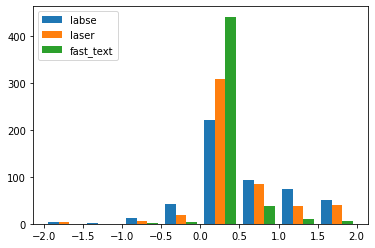

In [133]:
# tag distribution of model
plt.hist([crete_hist(labse_pair_path),crete_hist(laser_pair_path),crete_hist(fast_pair_path)], 8 , label=['labse','laser','fast_text'])
plt.legend(loc='upper left')
plt.show()

# NDCG Score For Each Model


In [69]:
def ndcg_scores(model,k,path):
  input_table =pd.read_csv(path)
  # print(input_table)
  table = input_table.drop(['Unnamed: 0','input_text','output_text','input_vector','output_vector'], axis=1)
  columns = ["model","input_id","k","tag"]
  output = pd.DataFrame([], columns=columns)
  for i in range(len(table)):
    input_id = int(table.iloc[i]['input_id'])
    output_id = int(table.iloc[i]['output_id'])
    for j in range(len(finall_output)):
      input_id2 = int(finall_output.iloc[j]['input_id'])
      output_id2 = int(finall_output.iloc[j]['output_id'])
      if(input_id == input_id2 and output_id==output_id2):
        tag1 = finall_output.iloc[j]['tag1']
        tag2 = finall_output.iloc[j]['tag2']
        mean_tag = abs((abs(tag1) + abs(tag2)) / 2)
        output = output.append({'model':model,'input_id':table.iloc[i]["input_id"],'k':table.iloc[i]["k"],'tag':mean_tag}, ignore_index = True)
  true_score = []
  relevance_score = []
  for i in range(len(output)):
    if ( i%k == 0 ):
      x = [ output.iloc[i+j]["tag"] for j in range(k) ]
      if(k==1):
        x.append(0)
      relevance_score.append(x)
      x.sort()
      true_score.append(x)
  return (ndcg_score(true_score, relevance_score))

In [82]:
LaBSE_NDCG = [ ndcg_scores("LaBSE",3,labse_poem_pair_path),
ndcg_scores("LaBSE",2,labse_quotes_pair_path),
ndcg_scores("LaBSE",2,labse_shams_pair_path),
ndcg_scores("LaBSE",2,labse_hafez_pair_path)]
print_arg("LaBSE NDCG" , LaBSE_NDCG)

____________________________________________________________________________________________________
LaBSE NDCG  Score is : 
           tak abiat : 0.8
      english quotes : 0.8
        divane shams : 0.8
      qazaliat hafez : 0.78
____________________________________________________________________________________________________


In [84]:
LASER_NDCG = [ ndcg_scores("LASER",3,laser_poem_pair_path),
ndcg_scores("LASER",2,laser_quotes_pair_path),
ndcg_scores("LASER",2,laser_shams_pair_path),
ndcg_scores("LASER",2,laser_hafez_pair_path)]
print_arg("LASER NDCG" , LASER_NDCG)

____________________________________________________________________________________________________
LASER NDCG  Score is : 
           tak abiat : 0.72
      english quotes : 0.78
        divane shams : 0.6
      qazaliat hafez : 0.5
____________________________________________________________________________________________________


In [83]:
Fast_Text_NDCG = [ ndcg_scores("Fast_Text",3,fast_poem_pair_path),
ndcg_scores("Fast_Text",2,fast_quotes_pair_path),
ndcg_scores("Fast_Text",2,fast_shams_pair_path),
ndcg_scores("Fast_Text",2,fast_hafez_pair_path)]
print_arg("Fast Text NDCG" , Fast_Text_NDCG)

____________________________________________________________________________________________________
Fast Text NDCG  Score is : 
           tak abiat : 0.38
      english quotes : 0.16
        divane shams : 0.2
      qazaliat hafez : 0.26
____________________________________________________________________________________________________


# CG@1 Score For Each Model


In [88]:
def cg_score(model,k,path):
  input_table =pd.read_csv(path)
  # print(input_table)
  table = input_table.drop(['Unnamed: 0','input_text','output_text','input_vector','output_vector'], axis=1)
  columns = ["model","input_id","k","tag"]
  output = pd.DataFrame([], columns=columns)
  for i in range(len(table)):
    input_id = int(table.iloc[i]['input_id'])
    output_id = int(table.iloc[i]['output_id'])
    for j in range(len(finall_output)):
      input_id2 = int(finall_output.iloc[j]['input_id'])
      output_id2 = int(finall_output.iloc[j]['output_id'])
      if(input_id == input_id2 and output_id==output_id2):
        tag1 = finall_output.iloc[j]['tag1']
        tag2 = finall_output.iloc[j]['tag2']
        mean_tag = abs((abs(tag1) + abs(tag2)) / 2)
        output = output.append({'model':model,'input_id':table.iloc[i]["input_id"],'k':table.iloc[i]["k"],'tag':mean_tag}, ignore_index = True)
  true_score = []
  relevance_score = []
  for i in range(len(output)):
    if ( i%k == 0 ):
      x = [ output.iloc[i+j]["tag"] for j in range(k) ]
      x.append(0)
      relevance_score.append(x)
      x.sort()
      true_score.append(x)
      
  return (dcg_score(true_score,relevance_score, k=1))

In [89]:
LaBSE_CG_1 = [ cg_score("LaBSE",1,labse_poem_pair_path),
cg_score("LaBSE",1,labse_quotes_pair_path),
cg_score("LaBSE",1,labse_shams_pair_path),
cg_score("LaBSE",1,labse_hafez_pair_path),
cg_score("LaBSE",1,labse_nahj_pair_path)]
print_arg("LaBSE CG@1" , LaBSE_CG_1)

____________________________________________________________________________________________________
LaBSE CG@1  Score is : 
           tak abiat : 0.4266666666666667
      english quotes : 0.575
        divane shams : 0.515
      qazaliat hafez : 0.535
hekam nahjol balaghe : 0.72
____________________________________________________________________________________________________


In [91]:
LASER_CG_1 = [ cg_score("LASER",1,laser_poem_pair_path),
cg_score("LASER",1,laser_quotes_pair_path),
cg_score("LASER",1,laser_shams_pair_path),
cg_score("LASER",1,laser_hafez_pair_path),
cg_score("LASER",1,laser_nahj_pair_path)]
print_arg("LASER CG@1" , LASER_CG_1)

____________________________________________________________________________________________________
LASER CG@1  Score is : 
           tak abiat : 0.38
      english quotes : 0.545
        divane shams : 0.3
      qazaliat hafez : 0.2
hekam nahjol balaghe : 0.39
____________________________________________________________________________________________________


In [90]:
Fast_Text_CG_1 = [ cg_score("Fast_Text",1,fast_poem_pair_path),
cg_score("Fast_Text",1,fast_quotes_pair_path),
cg_score("Fast_Text",1,fast_shams_pair_path),
cg_score("Fast_Text",1,fast_hafez_pair_path),
cg_score("Fast_Text",1,fast_nahj_pair_path)]
print_arg("Fast Text CG@1" , Fast_Text_CG_1)

____________________________________________________________________________________________________
Fast Text CG@1  Score is : 
           tak abiat : 0.12666666666666668
      english quotes : 0.055
        divane shams : 0.07
      qazaliat hafez : 0.1
hekam nahjol balaghe : 0.03
____________________________________________________________________________________________________


# MRR Score For Each Model


In [92]:
def mrr_score(model,k,path):
  input_table =pd.read_csv(path)
  # print(input_table)
  table = input_table.drop(['Unnamed: 0','input_text','output_text','input_vector','output_vector'], axis=1)
  columns = ["model","input_id","k","tag"]
  output = pd.DataFrame([], columns=columns)
  for i in range(len(table)):
    input_id = int(table.iloc[i]['input_id'])
    output_id = int(table.iloc[i]['output_id'])
    for j in range(len(finall_output)):
      input_id2 = int(finall_output.iloc[j]['input_id'])
      output_id2 = int(finall_output.iloc[j]['output_id'])
      if(input_id == input_id2 and output_id==output_id2):
        tag1 = finall_output.iloc[j]['tag1']
        tag2 = finall_output.iloc[j]['tag2']
        mean_tag = abs((abs(tag1) + abs(tag2)) / 2)
        output = output.append({'model':model,'input_id':table.iloc[i]["input_id"],'k':table.iloc[i]["k"],'tag':mean_tag}, ignore_index = True)
  true_score = []
  relevance_score = []
  for i in range(len(output)):
    if ( i%k == 0 ):
      x = [ output.iloc[i+j]["tag"] for j in range(k) ]
      if(k==0):
        x.append(0)
      relevance_score.append(x)
      x.sort()
      true_score.append(x)
      mrr = tfr.keras.metrics.MRRMetric()
  return (mrr(true_score,relevance_score).numpy())

In [93]:
LaBSE_mrr = [ mrr_score("LaBSE",3,labse_poem_pair_path),
mrr_score("LaBSE",2,labse_quotes_pair_path),
mrr_score("LaBSE",2,labse_shams_pair_path),
mrr_score("LaBSE",2,labse_hafez_pair_path),
mrr_score("LaBSE",1,labse_nahj_pair_path)]
print_arg("LaBSE mrr" , LaBSE_mrr)

____________________________________________________________________________________________________
LaBSE mrr  Score is : 
           tak abiat : 0.6
      english quotes : 0.52
        divane shams : 0.54
      qazaliat hafez : 0.46
hekam nahjol balaghe : 0.4
____________________________________________________________________________________________________


In [95]:
LASER_mrr = [ mrr_score("LASER",1,laser_poem_pair_path),
mrr_score("LASER",1,laser_quotes_pair_path),
mrr_score("LASER",1,laser_shams_pair_path),
mrr_score("LASER",1,laser_hafez_pair_path),
mrr_score("LASER",1,laser_nahj_pair_path)]
print_arg("LASER mrr" , LASER_mrr)

____________________________________________________________________________________________________
LASER mrr  Score is : 
           tak abiat : 0.21333334
      english quotes : 0.29
        divane shams : 0.17
      qazaliat hafez : 0.09
hekam nahjol balaghe : 0.24
____________________________________________________________________________________________________


In [94]:
Fast_Text_mrr = [ mrr_score("Fast_Text",1,fast_poem_pair_path),
mrr_score("Fast_Text",1,fast_quotes_pair_path),
mrr_score("Fast_Text",1,fast_shams_pair_path),
mrr_score("Fast_Text",1,fast_hafez_pair_path),
mrr_score("Fast_Text",1,fast_nahj_pair_path)]
print_arg("Fast Text mrr" , Fast_Text_mrr)

____________________________________________________________________________________________________
Fast Text mrr  Score is : 
           tak abiat : 0.053333335
      english quotes : 0.02
        divane shams : 0.03
      qazaliat hafez : 0.06
hekam nahjol balaghe : 0.0
____________________________________________________________________________________________________
